Sugestão do chatgpt

Introdução: Explorando Tendências no Mercado Automotivo

O mercado automotivo é um setor dinâmico e em constante evolução, onde as preferências dos consumidores, as inovações tecnológicas e os padrões econômicos desempenham papéis cruciais na determinação das tendências de venda e no sucesso das empresas. Com um vasto conjunto de dados à nossa disposição, propomos uma análise abrangente para desvendar os padrões subjacentes e as dinâmicas do mercado de carros.

Nossa análise visa oferecer uma visão panorâmica, abordando uma variedade de aspectos, desde o perfil demográfico dos compradores até a influência de diferentes atributos do veículo no comportamento do consumidor. Ao mergulhar nas camadas de dados disponíveis, buscamos identificar correlações significativas, tendências emergentes e insights valiosos que possam informar estratégias de negócios e tomadas de decisão fundamentadas.

Ao compreender as nuances do mercado automotivo, esperamos fornecer informações cruciais não apenas para fabricantes e revendedores de automóveis, mas também para consumidores que buscam tomar decisões informadas de compra. Nossa análise pretende ser uma ferramenta poderosa para orientar estratégias de marketing, desenvolvimento de produtos e expansão de mercado, capacitando as empresas a se adaptarem às demandas em constante mudança do setor automotivo.

Nesta jornada de exploração de dados, estamos ansiosos para desvendar os segredos por trás das tendências do mercado automotivo e oferecer insights valiosos que possam impulsionar o sucesso e a inovação neste setor crucial da economia global.






**1. Análise de Vendas por Região do Revendedor:** Você pode agrupar os dados pelo "Dealer_Region" e analisar as vendas totais ou médias em cada região.

**2. Segmentação de Clientes por Gênero e Renda Anual:** Explore a distribuição de gênero entre os clientes e como ela se relaciona com a renda anual. Isso pode ajudar a identificar padrões de compra entre diferentes grupos demográficos.

**3. Preço Médio por Modelo de Carro:** Analise o preço médio de venda para cada modelo de carro. Isso pode ajudar a identificar quais modelos têm maior demanda ou valor de mercado.

**4. Distribuição de Cores de Carros Vendidos:** Determine as cores mais populares entre os carros vendidos. Isso pode ser útil para entender as preferências dos clientes em termos de estética.

**5. Análise Temporal de Vendas:** Explore padrões sazonais ou tendências ao longo do tempo analisando as vendas em relação à data.

**6. Desempenho de Revendedores:** Compare o desempenho de diferentes revendedores em termos de número de vendas, receita gerada ou satisfação do cliente.

**7. Análise de Correlação:** Explore se existe alguma correlação entre variáveis, como preço do carro e renda anual do cliente.

**8. Distribuição de Estilos de Carro Vendidos:** Analise a distribuição dos estilos de carro vendidos (por exemplo, sedan, SUV, hatchback) para entender as preferências do mercado.

**9. Análise de Engenharia e Transmissão por Modelo:** Veja se há alguma preferência específica de engenharia (por exemplo, motor de 4 cilindros, 6 cilindros) ou tipo de transmissão (automático, manual) para cada modelo de carro.

**10. Análise de Satisfação do Cliente:** Explore a relação entre o nome do cliente, o revendedor e possivelmente outras variáveis para entender os níveis de satisfação do cliente e identificar áreas para melhoria.

**11. Análise de Distribuição de Idade dos Clientes:** Se houver informações sobre a idade dos clientes, você pode analisar a distribuição etária dos compradores de carros.

**12. Variação de Preço por Cor e Estilo do Carro:** Analise se há variação de preço com base na cor ou estilo do carro. Isso pode ajudar a determinar se certas características têm impacto no valor de mercado.

**13. Análise de Demanda por Região e Estilo do Carro:** Explore se a demanda por diferentes estilos de carro varia entre as regiões dos revendedores.

**14. Análise de Desempenho do Modelo de Carro ao Longo do Tempo:** Analise como o desempenho de vendas de um determinado modelo de carro evolui ao longo do tempo desde o seu lançamento.

**15. Análise de Engajamento do Cliente com o Revendedor:** Explore a frequência de compra ou interação dos clientes com os revendedores ao longo do tempo.

**16. Análise de Sazonalidade nas Vendas de Carros:** Identifique padrões sazonais nas vendas de carros, como picos de vendas durante determinadas épocas do ano.

**17. Análise de Lucratividade por Modelo de Carro e Revendedor:** Determine quais modelos de carro e revendedores são mais lucrativos com base nas margens de lucro.

**18. Análise de Preferências de Transmissão por Gênero:** Explore se há diferenças nas preferências de transmissão entre clientes de diferentes gêneros.

**19. Análise de Lealdade do Cliente:** Analise se os clientes tendem a comprar repetidamente da mesma marca ou revendedor ao longo do tempo.

**20. Análise de Correlação entre Características do Carro e Preço:** Investigação de possíveis correlações entre características específicas do carro, como tamanho do motor, tipo de transmissão ou cor, e o preço de venda.

In [208]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
# Leitura do dataset
dados = pd.read_csv('Car Sales.csv')

In [210]:
# Visualização dos dados
dados

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [211]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [212]:
dados.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [213]:
dados = dados.drop(columns = ['Car_id', 'Customer Name', 'Dealer_No ', 'Phone'], axis = 1)
dados.head()

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [214]:
dados.columns

Index(['Date', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', 'Price ($)', 'Body Style',
       'Dealer_Region'],
      dtype='object')

In [215]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23906 non-null  datetime64[ns]
 1   Gender         23906 non-null  object        
 2   Annual Income  23906 non-null  int64         
 3   Dealer_Name    23906 non-null  object        
 4   Company        23906 non-null  object        
 5   Model          23906 non-null  object        
 6   Engine         23906 non-null  object        
 7   Transmission   23906 non-null  object        
 8   Color          23906 non-null  object        
 9   Price ($)      23906 non-null  int64         
 10  Body Style     23906 non-null  object        
 11  Dealer_Region  23906 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 2.2+ MB


**1. Análise de Vendas por Região do Revendedor:** Você pode agrupar os dados pelo "Dealer_Region" e analisar as vendas totais ou médias em cada região.

In [216]:
vendas_resumo = dados.groupby('Dealer_Region')['Price ($)'].agg(['sum', 'mean'])
vendas_resumo

,sum,mean
Dealer_Region,,
Aurora,88687382,28334.626837
Austin,117192531,28341.603628
Greenville,88149602,28180.819054
Janesville,106351234,27833.350955
Middletown,87134628,27856.338875
Pasco,88040714,28119.039923
Scottsdale,95969374,27954.958928


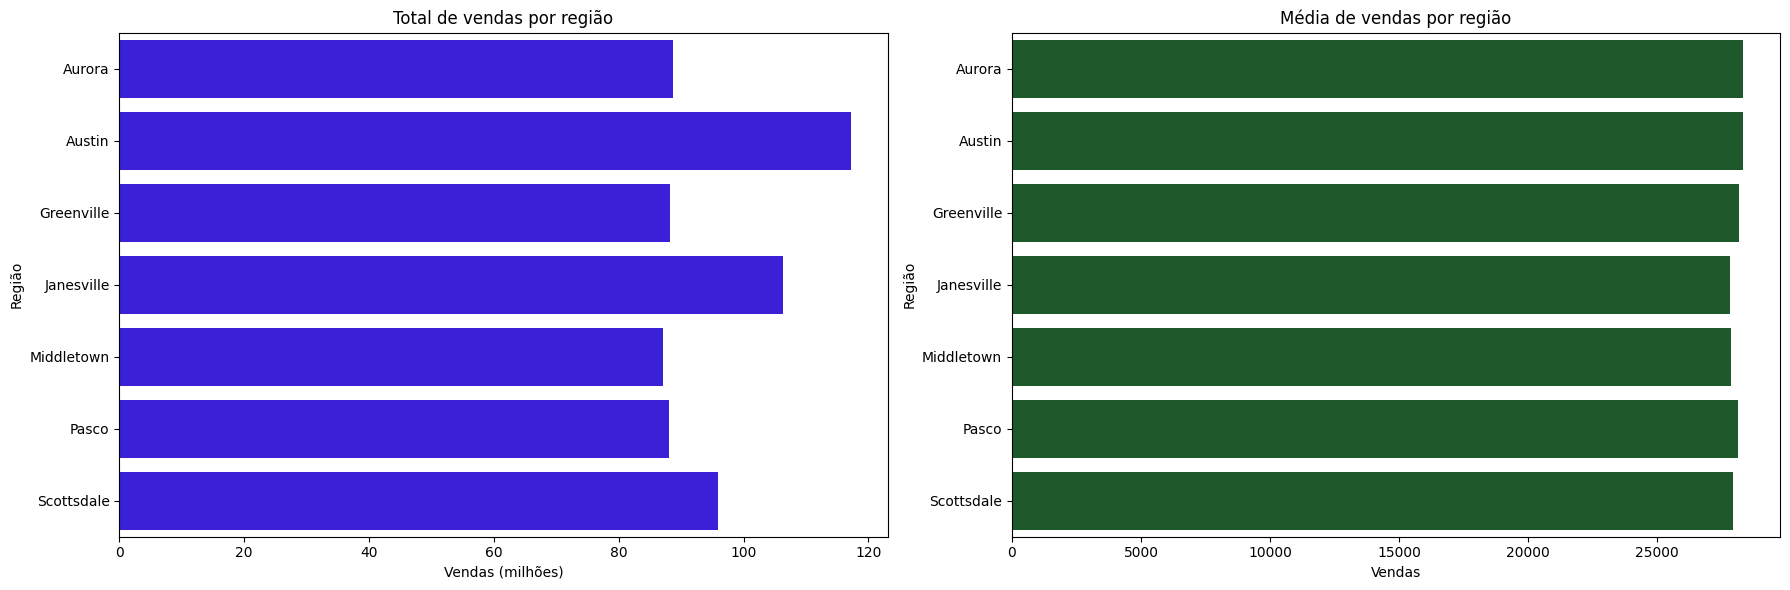

In [217]:
#Criando gráficos de Total e Média de vendas
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='sum', y='Dealer_Region', data=vendas_resumo/10**6, ax=axes[0], orient='h', color='#2401F5')
axes[0].set_title('Total de vendas por região')
axes[0].set_xlabel('Vendas (milhões)')
axes[0].set_ylabel('Região')

sns.barplot( x='mean', y='Dealer_Region', data=vendas_resumo, ax=axes[1], orient='h', color='#146325')
axes[1].set_title('Média de vendas por região')
axes[1].set_xlabel('Vendas')
axes[1].set_ylabel('Região')
plt.tight_layout()

plt.show()

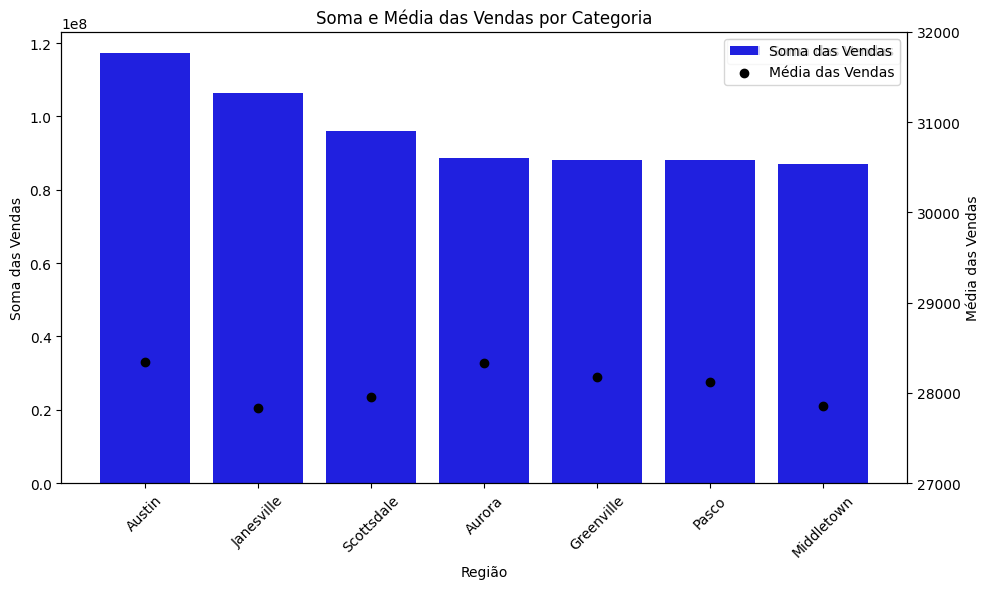

In [218]:
grupo_vendas = dados.groupby('Dealer_Region')['Price ($)'].agg(['sum', 'mean']).reset_index()

# Ordenar o DataFrame pela coluna de soma de vendas em ordem decrescente
grupo_vendas = grupo_vendas.sort_values(by='sum', ascending=False)

# Criação da figura e dos eixos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotagem da soma das vendas
sns.barplot(x='Dealer_Region', y='sum', data=grupo_vendas, color='blue', label='Soma das Vendas', ax=ax1)

# Configurações do eixo primário
ax1.set_xlabel('Região')
ax1.set_ylabel('Soma das Vendas')
ax1.tick_params(axis='x', rotation=45)

# Criação do eixo secundário para a média
ax2 = ax1.twinx()
ax2.scatter(grupo_vendas['Dealer_Region'], grupo_vendas['mean'], color='black', label='Média das Vendas')

# Configurações do eixo secundário
ax2.set_ylabel('Média das Vendas')
ax2.set_ylim(27000, 32000)  # Definindo o intervalo desejado para o eixo secundário

# Adicionando legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Soma e Média das Vendas por Categoria')
plt.tight_layout()
plt.show()

**2. Segmentação de Clientes por Gênero e Renda Anual:** Explore a distribuição de gênero entre os clientes e como ela se relaciona com a renda anual. Isso pode ajudar a identificar padrões de compra entre diferentes grupos demográficos.

In [219]:
dados.groupby('Gender')[['Annual Income']].agg(['count', 'mean'])

Annual Income               
               count           mean
Gender                             
Female          5108  755973.021339
Male           18798  851184.044207

In [220]:
#Criando dados para segmentar os clientes
dados.loc[dados['Annual Income']<100000, 'Income_Category'] = 'Até 100 mil'
dados.loc[(dados['Annual Income']>=100000) & (dados['Annual Income']<500000.0), 'Income_Category'] = 'De 100 a 500 mil'
dados.loc[(dados['Annual Income']>=500000) & (dados['Annual Income']<1000000.0), 'Income_Category'] = 'De 500 mil a 1 milhão'
dados.loc[dados['Annual Income']>1000000, 'Income_Category'] = 'Maior que 1 milhão'
dados.head(3)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Income_Category
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,Até 100 mil
1,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,Maior que 1 milhão
2,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,Maior que 1 milhão


In [221]:
male_category = dados[dados['Gender'] == 'Male']
female_category = dados[dados['Gender'] == 'Female']

male_income_category = male_category.groupby(['Income_Category'])[['Gender']].count() 
female_income_category = female_category.groupby(['Income_Category'])[['Gender']].count()

In [222]:
male_income_category

,Gender
Income_Category,
Até 100 mil,4140
De 100 a 500 mil,1539
De 500 mil a 1 milhão,6749
Maior que 1 milhão,6264


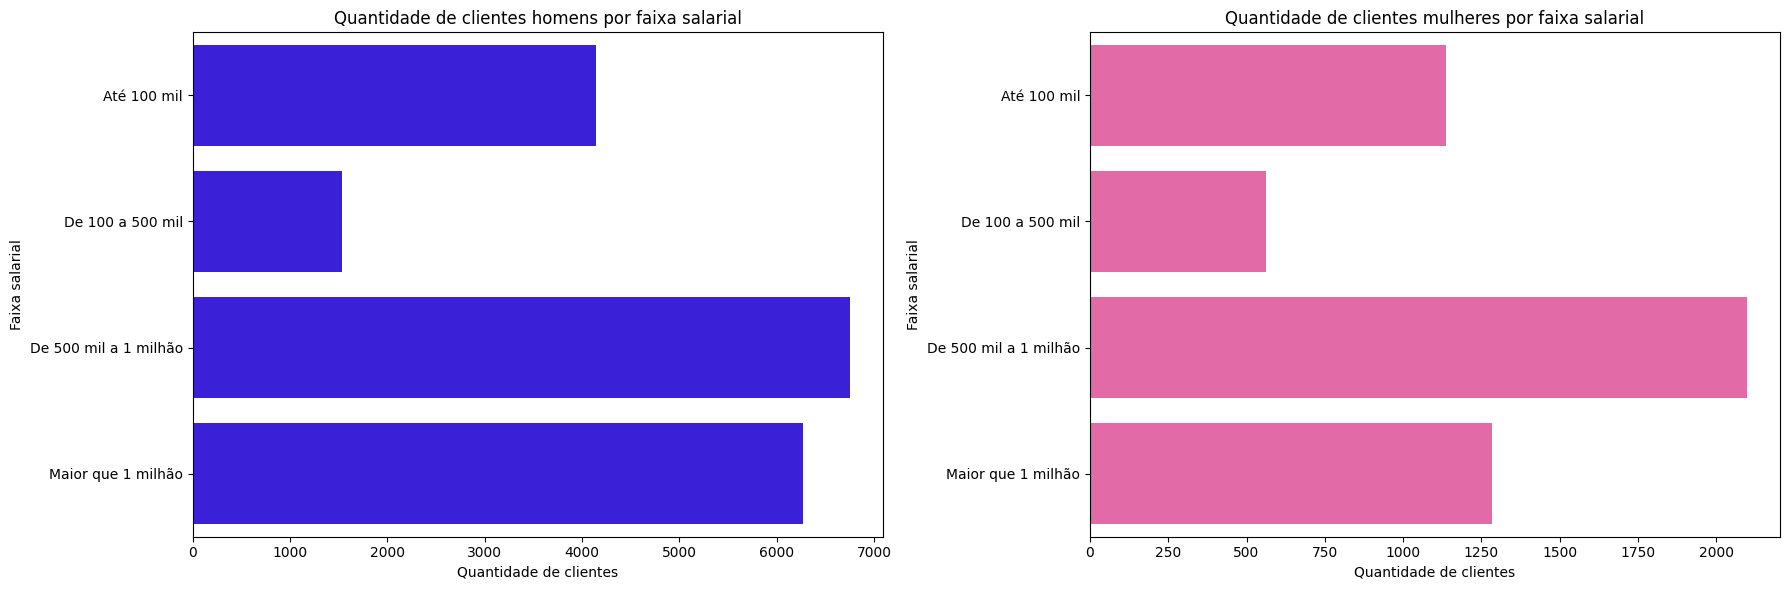

In [223]:
#Criando gráficos de categoria
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Gender', y='Income_Category', data=male_income_category, ax=axes[0], orient='h', color='#2401F5')
axes[0].set_title('Quantidade de clientes homens por faixa salarial')
axes[0].set_xlabel('Quantidade de clientes')
axes[0].set_ylabel('Faixa salarial')

sns.barplot(x='Gender', y='Income_Category', data=female_income_category, ax=axes[1], orient='h', color='#F556A8')
axes[1].set_title('Quantidade de clientes mulheres por faixa salarial')
axes[1].set_xlabel('Quantidade de clientes')
axes[1].set_ylabel('Faixa salarial')
plt.tight_layout()

plt.show()

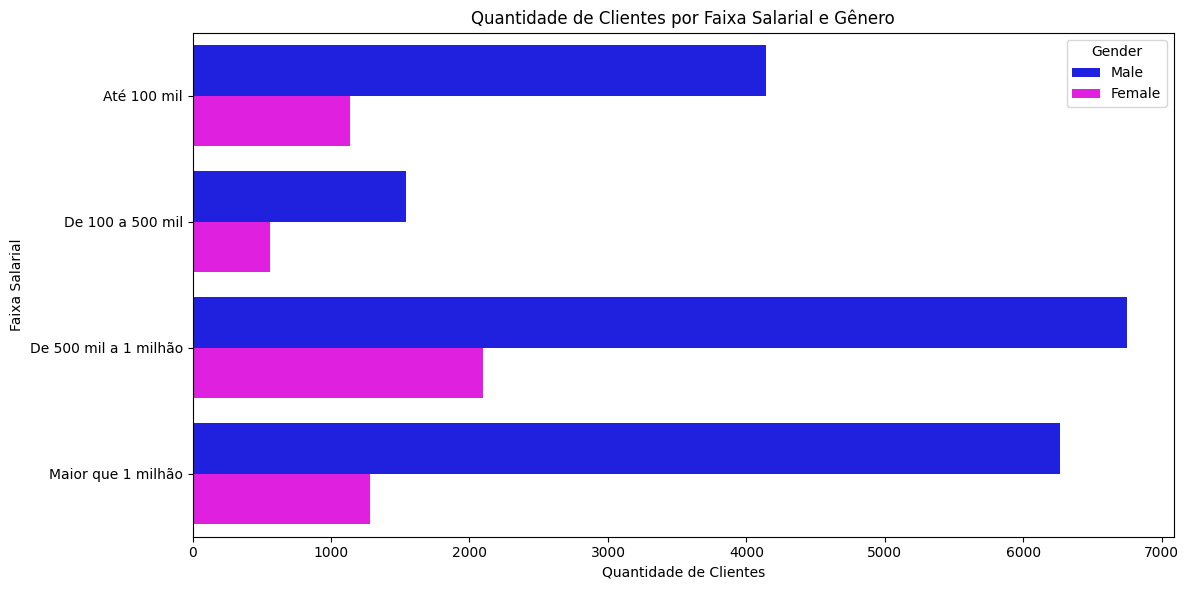

In [224]:
# Suponha que 'dados' seja o DataFrame original com os dados dos clientes
# Primeiro, filtramos os dados para criar DataFrames separados para homens e mulheres
male_category = dados[dados['Gender'] == 'Male']
female_category = dados[dados['Gender'] == 'Female']

# Em seguida, agrupamos cada DataFrame por 'Income_Category' e contamos o número de ocorrências de cada categoria
male_income_category = male_category.groupby('Income_Category').size().reset_index(name='Quantity')
female_income_category = female_category.groupby('Income_Category').size().reset_index(name='Quantity')

# Combinando os DataFrames em um único DataFrame
combined_data = pd.concat([male_income_category.assign(Gender='Male'), female_income_category.assign(Gender='Female')])

# Criando o gráfico de barras combinado
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Income_Category', hue='Gender', data=combined_data, orient='h', palette={'Male': 'blue', 'Female': 'fuchsia'})
plt.title('Quantidade de Clientes por Faixa Salarial e Gênero')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Faixa Salarial')
plt.tight_layout()
plt.show()

**3. Preço Médio por Modelo de Carro:** Analise o preço médio de venda para cada modelo de carro. Isso pode ajudar a identificar quais modelos têm maior demanda ou valor de mercado.

In [225]:
# 10 modelos mais caros
model_count_price = dados.groupby(['Model'])[['Gender', 'Price ($)']].agg({'Gender':'count', 'Price ($)':'mean'}).reset_index()
model_count_price.columns = ['Model', 'Count', 'Mean Price']
model_count_price['Mean Price'] = model_count_price['Mean Price'].round(2)
model_count_price_top10 = model_count_price.sort_values(['Count'], ascending=False).head(10).reset_index()
model_count_price_top10


,index,Model,Count,Mean Price
0,51,Diamante,418,22268.30
1,137,Silhouette,411,29858.51
2,109,Prizm,411,22838.46
3,106,Passat,391,19600.73
4,115,Ram Pickup,383,27820.86
5,81,Jetta,382,32166.85
6,113,RL,372,23598.49
7,84,LS400,354,40292.16
8,82,LHS,330,27568.84
9,9,A6,329,22662.98


Text(0.5, 0, 'Modelo')

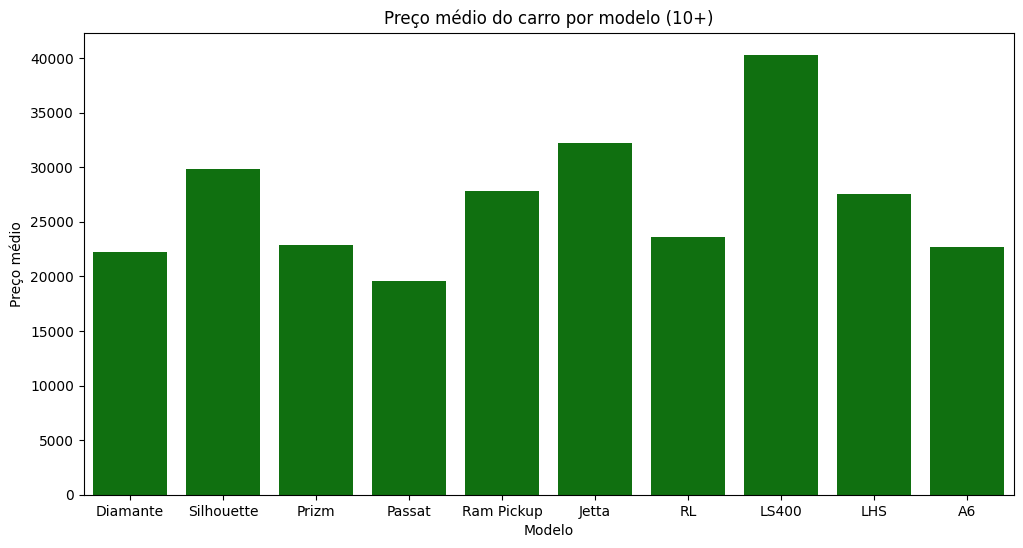

In [226]:
#Criando gráficos de preço médio por modelo
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Mean Price', data=model_count_price_top10, color='Green')
plt.title('Preço médio do carro por modelo (10+)')
plt.ylabel('Preço médio')
plt.xlabel('Modelo')


In [227]:
#Adicionando coluna mês em dados
dados['year'] = dados['Date'].dt.year.astype(str)
dados['month'] = dados['Date'].dt.month.astype(str)
dados['month'] = dados['month'].apply('{:0>2}'.format)
dados['year-month'] = dados['year'] + dados['month']
dados['year-month'].astype(int)
dados.head(3)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Income_Category,year,month,year-month
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,Até 100 mil,2022,01,202201
1,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,Maior que 1 milhão,2022,01,202201
2,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,Maior que 1 milhão,2022,01,202201


In [228]:
#Agregando preço por ano/mês
price_month = dados.groupby('year-month').agg({'Price ($)':'mean'}).reset_index()

In [229]:
price_month['Price ($)'] = price_month['Price ($)'].round(2)
price_month = price_month[['year-month', 'Price ($)']]
price_month.columns = ['year-month', 'Mean Price']

price_month['year-month'] = price_month['year-month'].str.slice(2, 4) + '-' + price_month['year-month'].str.slice(4, 7)
#price_month['year-month'] = pd.to_datetime(price_month['year-month'])
price_month

,year-month,Mean Price
0,22-01,28355.30
1,22-02,27485.52
2,22-03,27662.50
3,22-04,28436.08
4,22-05,27477.45
5,22-06,28411.90
6,22-07,28478.57
7,22-08,29174.52
8,22-09,28622.52
9,22-10,28732.35


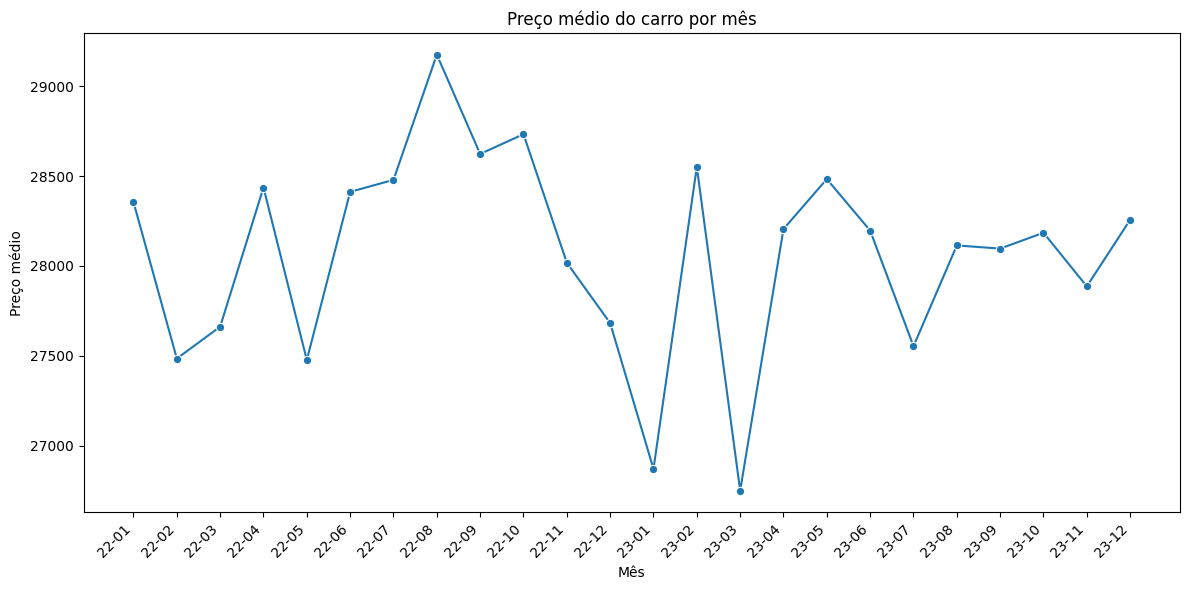

In [230]:
#Gerando gráfico de linha de vendas mensais nos últimos 2 anos
plt.figure(figsize=(12, 6))
ordem = list(price_month['year-month'])
sns.lineplot( x= 'year-month', y='Mean Price', data= price_month, marker= 'o')
plt.title('Preço médio do carro por mês')
plt.ylabel('Preço médio')
plt.xlabel('Mês')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [249]:
#Criando quantidade de vendas por mês
qtd_month = dados.groupby('year-month').agg({'Model':'count'}).reset_index()
qtd_month['year-month'] = qtd_month['year-month'].str.slice(2, 4) + '-' + qtd_month['year-month'].str.slice(4, 7)
qtd_month.columns = ['year-month', 'Qtt']
qtd_month

,year-month,Qtt
0,22-01,315
1,22-02,320
2,22-03,705
3,22-04,800
4,22-05,750
5,22-06,690
6,22-07,700
7,22-08,810
8,22-09,1475
9,22-10,835


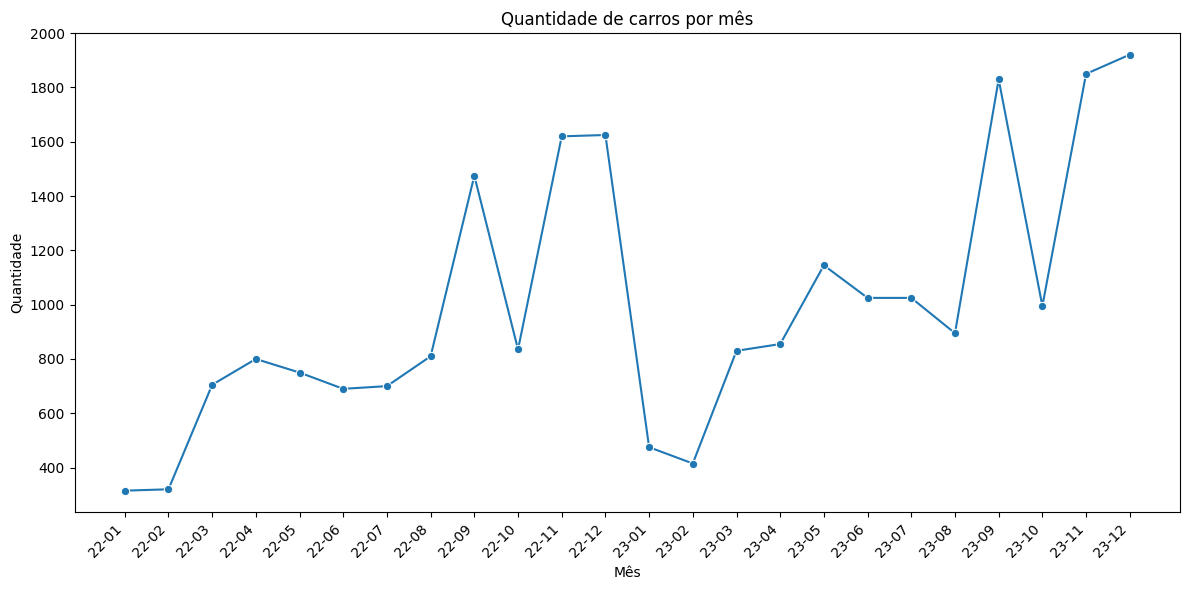

In [251]:
#Plotando quantidade por mês
plt.figure(figsize=(12, 6))
ordem = list(price_month['year-month'])
sns.lineplot( x= 'year-month', y='Qtt', data= qtd_month, marker= 'o')
plt.title('Quantidade de carros por mês')
plt.ylabel('Quantidade')
plt.xlabel('Mês')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**4. Distribuição de Cores de Carros Vendidos:** Determine as cores mais populares entre os carros vendidos. Isso pode ser útil para entender as preferências dos clientes em termos de estética.

In [232]:
dados['Color'].value_counts()

Color
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64

**5. Análise Temporal de Vendas:** Explore padrões sazonais ou tendências ao longo do tempo analisando as vendas em relação à data.

In [233]:
dados_temporais = dados.copy()

dados_temporais['Year'] = dados_temporais['Date'].dt.year
dados_temporais['Month'] = dados_temporais['Date'].dt.month
dados_temporais['Month_name'] = dados_temporais['Date'].dt.strftime('%B')

In [234]:
dados_temporais.head()

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Income_Category,year,month,year-month,Year,Month,Month_name
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,Até 100 mil,2022,01,202201,2022,1,January
1,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,Maior que 1 milhão,2022,01,202201,2022,1,January
2,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,Maior que 1 milhão,2022,01,202201,2022,1,January
3,2022-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,Até 100 mil,2022,01,202201,2022,1,January
4,2022-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,Maior que 1 milhão,2022,01,202201,2022,1,January


In [235]:
dados_temporais.groupby('Year')['Price ($)'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Year,,,
2022,10645,300340345,28214.217473
2023,13261,371185120,27990.733730


In [236]:
dados_temporais.groupby('Month')['Price ($)'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Month,,,
1,790,21696218,27463.567089
2,735,20643945,28087.000000
3,1535,41705873,27169.949837
4,1655,46864434,28316.878550
5,1895,53221243,28085.088654
6,1715,48505902,28283.324781
7,1725,48178032,27929.293913
8,1705,48793638,28617.969501
9,3305,93635178,28331.370045


In [237]:
dados_temporais.groupby(['Year', 'Month'])['Price ($)'].agg(['count', 'sum', 'mean'])

count       sum          mean
Year Month                               
2022 1        315   8931920  28355.301587
     2        320   8795365  27485.515625
     3        705  19502059  27662.495035
     4        800  22748867  28436.083750
     5        750  20608086  27477.448000
     6        690  19604211  28411.900000
     7        700  19935002  28478.574286
     8        810  23631362  29174.520988
     9       1475  42218216  28622.519322
     10       835  23991509  28732.346108
     11      1620  45389290  28018.080247
     12      1625  44984458  27682.743385
2023 1        475  12764298  26872.206316
     2        415  11848580  28550.795181
     3        830  22203814  26751.583133
     4        855  24115567  28205.341520
     5       1145  32613157  28483.106550
     6       1025  28901691  28196.771707
     7       1025  28243030  27554.175610
     8        895  25162276  28114.274860
     9       1830  51416962  28096.700546
     10       995  28043756  28184.679397
     11      1850  51590388  27886.696216
     12      1921  54281601  28256.950026

**6. Desempenho de Revendedores:** Compare o desempenho de diferentes revendedores em termos de número de vendas, receita gerada ou satisfação do cliente.

In [238]:
dados.groupby('Dealer_Name')['Price ($)'].agg(['count', 'sum'])

,count,sum
Dealer_Name,,
Buddy Storbeck's Diesel Service Inc,627,17065223
C & M Motors Inc,625,17569847
Capitol KIA,628,17703134
Chrysler Plymouth,625,17222204
Chrysler of Tri-Cities,626,17605055
Classic Chevy,623,17819055
Clay Johnson Auto Sales,627,17440649
Diehl Motor CO Inc,624,17468212
Enterprise Rent A Car,625,17695363


**7. Análise de Correlação:** Explore se existe alguma correlação entre variáveis, como preço do carro e renda anual do cliente.

In [239]:
dados['Body Style'].value_counts()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

In [240]:
mapeamento = {'Male': 0, 'Female': 1, 
              'DoubleÂ Overhead Camshaft': 0, 'Overhead Camshaft': 1,
              'Auto': 0, 'Manual': 1}
dados_mapeados = dados.copy()
dados_mapeados['Gender'] = dados['Gender'].map(mapeamento)
dados_mapeados['Engine'] = dados['Engine'].map(mapeamento)
dados_mapeados['Transmission'] = dados['Transmission'].map(mapeamento)
dados_mapeados


,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Income_Category,year,month,year-month
0,2022-01-02,0,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,NaN,0,Black,26000,SUV,Middletown,Até 100 mil,2022,01,202201
1,2022-01-02,0,1480000,C & M Motors Inc,Dodge,Durango,NaN,0,Black,19000,SUV,Aurora,Maior que 1 milhão,2022,01,202201
2,2022-01-02,0,1035000,Capitol KIA,Cadillac,Eldorado,1.0,1,Red,31500,Passenger,Greenville,Maior que 1 milhão,2022,01,202201
3,2022-01-02,0,13500,Chrysler of Tri-Cities,Toyota,Celica,1.0,1,Pale White,14000,SUV,Pasco,Até 100 mil,2022,01,202201
4,2022-01-02,0,1465000,Chrysler Plymouth,Acura,TL,NaN,0,Red,24500,Hatchback,Janesville,Maior que 1 milhão,2022,01,202201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,2023-12-31,0,13500,C & M Motors Inc,Plymouth,Voyager,1.0,1,Red,12000,Passenger,Pasco,Até 100 mil,2023,12,202312
23902,2023-12-31,1,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,NaN,0,Black,16000,Hardtop,Middletown,De 500 mil a 1 milhão,2023,12,202312
23903,2023-12-31,0,705000,Chrysler of Tri-Cities,BMW,328i,1.0,1,Red,21000,Sedan,Scottsdale,De 500 mil a 1 milhão,2023,12,202312
23904,2023-12-31,0,13500,Chrysler Plymouth,Chevrolet,Metro,NaN,0,Black,31000,Passenger,Austin,Até 100 mil,2023,12,202312


In [241]:
dados_encoded = pd.get_dummies(dados_mapeados['Color'], prefix='Color').astype(int)
dados_mapeados = pd.concat([dados_mapeados, dados_encoded], axis=1)
dados_mapeados

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Income_Category,year,month,year-month,Color_Black,Color_Pale White,Color_Red
0,2022-01-02,0,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,NaN,0,Black,26000,SUV,Middletown,Até 100 mil,2022,01,202201,1,0,0
1,2022-01-02,0,1480000,C & M Motors Inc,Dodge,Durango,NaN,0,Black,19000,SUV,Aurora,Maior que 1 milhão,2022,01,202201,1,0,0
2,2022-01-02,0,1035000,Capitol KIA,Cadillac,Eldorado,1.0,1,Red,31500,Passenger,Greenville,Maior que 1 milhão,2022,01,202201,0,0,1
3,2022-01-02,0,13500,Chrysler of Tri-Cities,Toyota,Celica,1.0,1,Pale White,14000,SUV,Pasco,Até 100 mil,2022,01,202201,0,1,0
4,2022-01-02,0,1465000,Chrysler Plymouth,Acura,TL,NaN,0,Red,24500,Hatchback,Janesville,Maior que 1 milhão,2022,01,202201,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,2023-12-31,0,13500,C & M Motors Inc,Plymouth,Voyager,1.0,1,Red,12000,Passenger,Pasco,Até 100 mil,2023,12,202312,0,0,1
23902,2023-12-31,1,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,NaN,0,Black,16000,Hardtop,Middletown,De 500 mil a 1 milhão,2023,12,202312,1,0,0
23903,2023-12-31,0,705000,Chrysler of Tri-Cities,BMW,328i,1.0,1,Red,21000,Sedan,Scottsdale,De 500 mil a 1 milhão,2023,12,202312,0,0,1
23904,2023-12-31,0,13500,Chrysler Plymouth,Chevrolet,Metro,NaN,0,Black,31000,Passenger,Austin,Até 100 mil,2023,12,202312,1,0,0


In [242]:
dados_encoded = pd.get_dummies(dados_mapeados['Body Style'], prefix='Body Style').astype(int)
dados_mapeados = pd.concat([dados_mapeados, dados_encoded], axis=1)
dados_mapeados

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),...,month,year-month,Color_Black,Color_Pale White,Color_Red,Body Style_Hardtop,Body Style_Hatchback,Body Style_Passenger,Body Style_SUV,Body Style_Sedan
0,2022-01-02,0,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,NaN,0,Black,26000,...,01,202201,1,0,0,0,0,0,1,0
1,2022-01-02,0,1480000,C & M Motors Inc,Dodge,Durango,NaN,0,Black,19000,...,01,202201,1,0,0,0,0,0,1,0
2,2022-01-02,0,1035000,Capitol KIA,Cadillac,Eldorado,1.0,1,Red,31500,...,01,202201,0,0,1,0,0,1,0,0
3,2022-01-02,0,13500,Chrysler of Tri-Cities,Toyota,Celica,1.0,1,Pale White,14000,...,01,202201,0,1,0,0,0,0,1,0
4,2022-01-02,0,1465000,Chrysler Plymouth,Acura,TL,NaN,0,Red,24500,...,01,202201,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,2023-12-31,0,13500,C & M Motors Inc,Plymouth,Voyager,1.0,1,Red,12000,...,12,202312,0,0,1,0,0,1,0,0
23902,2023-12-31,1,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,NaN,0,Black,16000,...,12,202312,1,0,0,1,0,0,0,0
23903,2023-12-31,0,705000,Chrysler of Tri-Cities,BMW,328i,1.0,1,Red,21000,...,12,202312,0,0,1,0,0,0,0,1
23904,2023-12-31,0,13500,Chrysler Plymouth,Chevrolet,Metro,NaN,0,Black,31000,...,12,202312,1,0,0,0,0,1,0,0


In [243]:
dados_mapeados = dados_mapeados.drop(columns = ['Date', 'Dealer_Name', 'Company', 'Model', 'Color', 'Body Style', 'Dealer_Region'])

In [244]:
dados_mapeados.corr()

ValueError: could not convert string to float: 'Até 100 mil'

**8. Distribuição de Estilos de Carro Vendidos:** Analise a distribuição dos estilos de carro vendidos (por exemplo, sedan, SUV, hatchback) para entender as preferências do mercado.

In [ ]:
dados['Body Style'].value_counts()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

**9. Análise de Engenharia e Transmissão por Modelo:** Veja se há alguma preferência específica de engenharia (por exemplo, motor de 4 cilindros, 6 cilindros) ou tipo de transmissão (automático, manual) para cada modelo de carro.

In [ ]:
frequencia = pd.crosstab(dados['Engine'],
                         dados['Transmission'])
frequencia

Transmission,Auto,Manual
Engine,,
DoubleÂ Overhead Camshaft,12571,0
Overhead Camshaft,0,11335


**12. Variação de Preço por Cor e Estilo do Carro:** Analise se há variação de preço com base na cor ou estilo do carro. Isso pode ajudar a determinar se certas características têm impacto no valor de mercado.

In [ ]:
dados.groupby(['Body Style', 'Color'])['Price ($)'].agg(['count', 'mean'])

count          mean
Body Style Color                          
Hardtop    Black         953  28671.027282
           Pale White   1459  29433.600411
           Red           559  29232.193202
Hatchback  Black        2023  29032.162630
           Pale White   2905  25885.319105
           Red          1200  26921.297500
Passenger  Black        1322  29384.076399
           Pale White   1752  27773.763699
           Red           871  30621.047072
SUV        Black        2248  25813.882117
           Pale White   2946  26342.702308
           Red          1180  29645.712712
Sedan      Black        1311  31657.290618
           Pale White   2194  29604.813127
           Red           983  27908.393693

**13. Análise de Demanda por Região e Estilo do Carro:** Explore se a demanda por diferentes estilos de carro varia entre as regiões dos revendedores.

**14. Análise de Desempenho do Modelo de Carro ao Longo do Tempo:** Analise como o desempenho de vendas de um determinado modelo de carro evolui ao longo do tempo desde o seu lançamento.


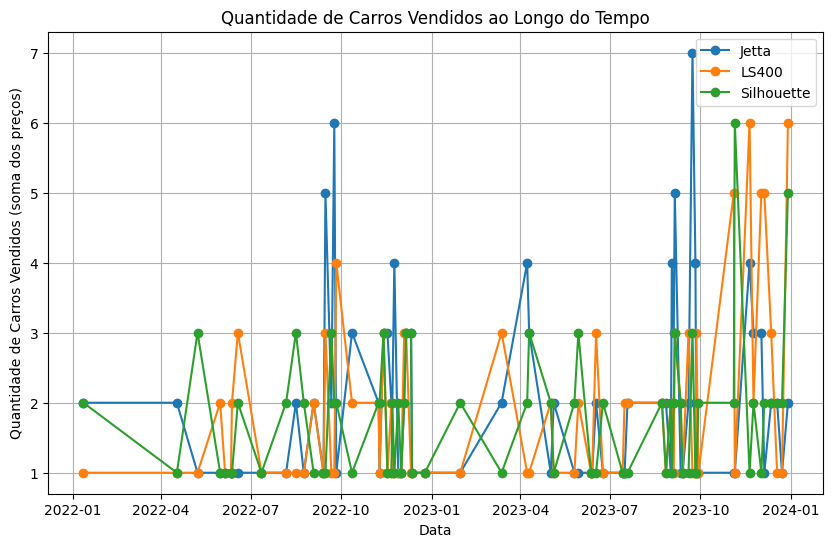

In [131]:
# Analisando o modelo mais lucrativo

carro_lucrativos = dados.groupby('Model')['Price ($)'].sum().reset_index()
top_carros_lucrativos = carro_lucrativos.sort_values(by='Price ($)', ascending=False).head(3)


analise_carro = dados.groupby(['Date', 'Model'])['Price ($)'].count().reset_index()


dados_filtrados = analise_carro[analise_carro['Model'].isin(top_carros_lucrativos['Model'])]


# Pivotar os dados para que cada modelo tenha sua própria série temporal
dados_pivotados = dados_filtrados.pivot(index='Date', columns='Model', values='Price ($)')
dados_pivotados = dados_pivotados.dropna()
dados_pivotados_resample = dados_pivotados.resample('3M').sum()

# Plotar um gráfico de linha para cada modelo
plt.figure(figsize=(10, 6))
for modelo in dados_pivotados.columns:
    plt.plot(dados_pivotados.index, dados_pivotados[modelo], label=modelo, marker='o', linestyle='-')

plt.xlabel('Data')
plt.ylabel('Quantidade de Carros Vendidos (soma dos preços)')
plt.title('Quantidade de Carros Vendidos ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()



In [107]:
for modelo in dados_filtrados['Model'].unique():
    print(modelo)

Jetta
Montero Sport
Ram Pickup
LS400
Silhouette


In [77]:
analise_carro

,Date,Model,count,mean
0,2022-01-02,3000GT,1,20000.0
1,2022-01-02,323i,1,15000.0
2,2022-01-02,4Runner,1,25000.0
3,2022-01-02,A4,1,12000.0
4,2022-01-02,Accent,1,18000.0
...,...,...,...,...
18958,2023-12-31,Sable,1,61000.0
18959,2023-12-31,Sunfire,1,43000.0
18960,2023-12-31,TL,1,21900.0
18961,2023-12-31,Viper,1,41000.0


**16. Análise de Sazonalidade nas Vendas de Carros:** Identifique padrões sazonais nas vendas de carros, como picos de vendas durante determinadas épocas do ano.


**17. Análise de Lucratividade por Modelo de Carro e Revendedor:** Determine quais modelos de carro e revendedores são mais lucrativos com base nas margens de lucro.


In [ ]:
lucratividade_marca = dados[['Price ($)', 'Model', 'Dealer_Name']].sort_values(by='Price ($)', ascending=False)
lucratividade_marca

In [ ]:
# Modelos de carros mais lucrativos

carro_lucrativos = lucratividade_marca.groupby('Model')['Price ($)'].sum().sort_values(ascending=False)
carro_lucrativos.head(10)

In [ ]:
# Revendedores mais lucrativos

revendedor_lucrativos = lucratividade_marca.groupby('Dealer_Name')['Price ($)'].sum().sort_values(ascending=False)

revendedor_lucrativos.head(10)


**18. Análise de Preferências de Transmissão por Gênero:** Explore se há diferenças nas preferências de transmissão entre clientes de diferentes gêneros.

Gender  Transmission
Male    Auto            9872
        Manual          8926
Female  Auto            2699
        Manual          2409
Name: count, dtype: int64

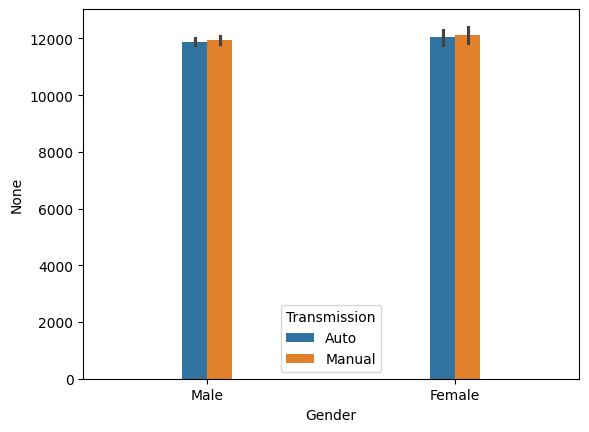

In [ ]:
# Tiramos a conclusão que nesse dataset, a transmissão não é um fator determinante na hora da compra, mas o Manual segue maior para ambos.
sns.barplot(data=dados, x=dados['Gender'], y=dados.index, hue='Transmission', width=0.2)

dados[['Gender', 'Transmission']].value_counts()


**20. Análise de Correlação entre Características do Carro e Preço:** Investigação de possíveis correlações entre características específicas do carro, como tamanho do motor, tipo de transmissão ou cor, e o preço de venda.

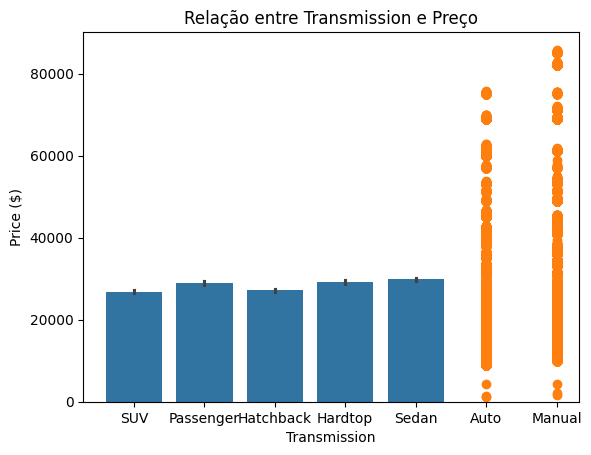

In [ ]:
caracteristicas_preco = dados[['Price ($)', 'Color', 'Transmission', 'Body Style']]

caracteristicas_preco.sort_values(by='Price ($)', ascending=False)

caracteristicas_preco['Color'].value_counts()

sns.barplot(data=caracteristicas_preco, x='Body Style', y='Price ($)')

plt.scatter(caracteristicas_preco['Transmission'], caracteristicas_preco['Price ($)'])
plt.xlabel('Transmission')
plt.ylabel('Price ($)')
plt.title('Relação entre Transmission e Preço')
plt.show()